In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
raw_data_train=pd.read_excel('Data_Train.xlsx')
raw_data_test=pd.read_excel('Data_Test.xlsx')

In [3]:
raw_data_train.describe(include='all')

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,A Game of Thrones (A Song of Ice and Fire),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [4]:
raw_data_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [5]:
trdata1=raw_data_train.copy()
tedata1=raw_data_test.copy()

In [6]:
trdata1.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [7]:
tedata1.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
dtype: int64

In [8]:
trdata1['Ratings'].unique()

array(['8 customer reviews', '14 customer reviews', '6 customer reviews',
       '13 customer reviews', '1 customer review', '72 customer reviews',
       '16 customer reviews', '111 customer reviews',
       '132 customer reviews', '17 customer reviews',
       '4 customer reviews', '3 customer reviews', '5 customer reviews',
       '2 customer reviews', '23 customer reviews', '76 customer reviews',
       '10 customer reviews', '9 customer reviews', '15 customer reviews',
       '34 customer reviews', '32 customer reviews',
       '49 customer reviews', '62 customer reviews',
       '61 customer reviews', '7 customer reviews', '18 customer reviews',
       '98 customer reviews', '12 customer reviews',
       '97 customer reviews', '285 customer reviews',
       '29 customer reviews', '27 customer reviews',
       '267 customer reviews', '24 customer reviews',
       '146 customer reviews', '95 customer reviews',
       '234 customer reviews', '35 customer reviews',
       '66 custome

In [9]:
trdata1['Ratings']=trdata1['Ratings'].str.replace(" customer reviews","")
tedata1['Ratings']=tedata1['Ratings'].str.replace(" customer reviews","")
trdata1.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [10]:
tedata1.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [11]:
trdata1['Ratings']=trdata1['Ratings'].str.replace(" customer review","")
trdata1.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [12]:
tedata1['Ratings']=tedata1['Ratings'].str.replace(" customer review","")
tedata1.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [13]:
trdata2=trdata1.drop(['Synopsis','Title','Author','Genre'],axis=1)
trdata2.head()

,Edition,Reviews,Ratings,BookCategory,Price
0,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8,Action & Adventure,220.00
1,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14,"Biographies, Diaries & True Accounts",202.93
2,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6,Humour,299.00
3,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13,"Crime, Thriller & Mystery",180.00
4,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1,"Arts, Film & Photography",965.62


In [14]:
tedata2=tedata1.drop(['Synopsis','Title','Author','Genre'],axis=1)
tedata2.head()

,Edition,Reviews,Ratings,BookCategory
0,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960,"Crime, Thriller & Mystery"
1,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1,"Computing, Internet & Digital Media"
2,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4,Romance
3,"Paperback,– 2016",4.1 out of 5 stars,11,"Computing, Internet & Digital Media"
4,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9,"Language, Linguistics & Writing"


In [15]:
trdata2['Reviews']=trdata1['Reviews'].str.replace(" out of 5 stars","")
trdata2.head()

,Edition,Reviews,Ratings,BookCategory,Price
0,"Paperback,– 10 Mar 2016",4.0,8,Action & Adventure,220.00
1,"Paperback,– 7 Nov 2012",3.9,14,"Biographies, Diaries & True Accounts",202.93
2,"Paperback,– 25 Feb 1982",4.8,6,Humour,299.00
3,"Paperback,– 5 Oct 2017",4.1,13,"Crime, Thriller & Mystery",180.00
4,"Hardcover,– 10 Oct 2006",5.0,1,"Arts, Film & Photography",965.62


In [16]:
tedata2['Reviews']=tedata1['Reviews'].str.replace(" out of 5 stars","")
tedata2.head()

,Edition,Reviews,Ratings,BookCategory
0,"Mass Market Paperback,– 1 Oct 1986",4.4,960,"Crime, Thriller & Mystery"
1,"Paperback,– Import, 26 Apr 2018",5.0,1,"Computing, Internet & Digital Media"
2,"Paperback,– 17 Mar 2011",5.0,4,Romance
3,"Paperback,– 2016",4.1,11,"Computing, Internet & Digital Media"
4,"Paperback,– 26 Dec 2011",4.4,9,"Language, Linguistics & Writing"


In [17]:
trdata2[['Edition_Type','Edition_date']]=trdata2['Edition'].str.split('–',expand=True)
trdata2.head()


,Edition,Reviews,Ratings,BookCategory,Price,Edition_Type,Edition_date
0,"Paperback,– 10 Mar 2016",4.0,8,Action & Adventure,220.00,"Paperback,",10 Mar 2016
1,"Paperback,– 7 Nov 2012",3.9,14,"Biographies, Diaries & True Accounts",202.93,"Paperback,",7 Nov 2012
2,"Paperback,– 25 Feb 1982",4.8,6,Humour,299.00,"Paperback,",25 Feb 1982
3,"Paperback,– 5 Oct 2017",4.1,13,"Crime, Thriller & Mystery",180.00,"Paperback,",5 Oct 2017
4,"Hardcover,– 10 Oct 2006",5.0,1,"Arts, Film & Photography",965.62,"Hardcover,",10 Oct 2006


In [18]:
tedata2[['Edition_Type','Edition_date']]=tedata2['Edition'].str.split('–',expand=True)
tedata2.head()


,Edition,Reviews,Ratings,BookCategory,Edition_Type,Edition_date
0,"Mass Market Paperback,– 1 Oct 1986",4.4,960,"Crime, Thriller & Mystery","Mass Market Paperback,",1 Oct 1986
1,"Paperback,– Import, 26 Apr 2018",5.0,1,"Computing, Internet & Digital Media","Paperback,","Import, 26 Apr 2018"
2,"Paperback,– 17 Mar 2011",5.0,4,Romance,"Paperback,",17 Mar 2011
3,"Paperback,– 2016",4.1,11,"Computing, Internet & Digital Media","Paperback,",2016
4,"Paperback,– 26 Dec 2011",4.4,9,"Language, Linguistics & Writing","Paperback,",26 Dec 2011


In [19]:
trdata3=trdata2.drop(['Edition'],axis=1)
trdata3.head()

,Reviews,Ratings,BookCategory,Price,Edition_Type,Edition_date
0,4.0,8,Action & Adventure,220.00,"Paperback,",10 Mar 2016
1,3.9,14,"Biographies, Diaries & True Accounts",202.93,"Paperback,",7 Nov 2012
2,4.8,6,Humour,299.00,"Paperback,",25 Feb 1982
3,4.1,13,"Crime, Thriller & Mystery",180.00,"Paperback,",5 Oct 2017
4,5.0,1,"Arts, Film & Photography",965.62,"Hardcover,",10 Oct 2006


In [20]:
tedata3=tedata2.drop(['Edition'],axis=1)
tedata3.head()

,Reviews,Ratings,BookCategory,Edition_Type,Edition_date
0,4.4,960,"Crime, Thriller & Mystery","Mass Market Paperback,",1 Oct 1986
1,5.0,1,"Computing, Internet & Digital Media","Paperback,","Import, 26 Apr 2018"
2,5.0,4,Romance,"Paperback,",17 Mar 2011
3,4.1,11,"Computing, Internet & Digital Media","Paperback,",2016
4,4.4,9,"Language, Linguistics & Writing","Paperback,",26 Dec 2011


In [21]:
trdata3['Edition_Type']=trdata3['Edition_Type'].str.replace(",","")
trdata3.head()

,Reviews,Ratings,BookCategory,Price,Edition_Type,Edition_date
0,4.0,8,Action & Adventure,220.00,Paperback,10 Mar 2016
1,3.9,14,"Biographies, Diaries & True Accounts",202.93,Paperback,7 Nov 2012
2,4.8,6,Humour,299.00,Paperback,25 Feb 1982
3,4.1,13,"Crime, Thriller & Mystery",180.00,Paperback,5 Oct 2017
4,5.0,1,"Arts, Film & Photography",965.62,Hardcover,10 Oct 2006


In [22]:
tedata3['Edition_Type']=tedata3['Edition_Type'].str.replace(",","")
tedata3.head()

,Reviews,Ratings,BookCategory,Edition_Type,Edition_date
0,4.4,960,"Crime, Thriller & Mystery",Mass Market Paperback,1 Oct 1986
1,5.0,1,"Computing, Internet & Digital Media",Paperback,"Import, 26 Apr 2018"
2,5.0,4,Romance,Paperback,17 Mar 2011
3,4.1,11,"Computing, Internet & Digital Media",Paperback,2016
4,4.4,9,"Language, Linguistics & Writing",Paperback,26 Dec 2011


In [23]:
trdata3['Edition_Year']=trdata3['Edition_date'].str.split(' ').str[-1]
trdata3.head()

,Reviews,Ratings,BookCategory,Price,Edition_Type,Edition_date,Edition_Year
0,4.0,8,Action & Adventure,220.00,Paperback,10 Mar 2016,2016
1,3.9,14,"Biographies, Diaries & True Accounts",202.93,Paperback,7 Nov 2012,2012
2,4.8,6,Humour,299.00,Paperback,25 Feb 1982,1982
3,4.1,13,"Crime, Thriller & Mystery",180.00,Paperback,5 Oct 2017,2017
4,5.0,1,"Arts, Film & Photography",965.62,Hardcover,10 Oct 2006,2006


In [24]:
trdata3=trdata3.drop(['Edition_date'],axis=1)
trdata3.head()

,Reviews,Ratings,BookCategory,Price,Edition_Type,Edition_Year
0,4.0,8,Action & Adventure,220.00,Paperback,2016
1,3.9,14,"Biographies, Diaries & True Accounts",202.93,Paperback,2012
2,4.8,6,Humour,299.00,Paperback,1982
3,4.1,13,"Crime, Thriller & Mystery",180.00,Paperback,2017
4,5.0,1,"Arts, Film & Photography",965.62,Hardcover,2006


In [25]:
tedata3['Edition_year']=tedata3['Edition_date'].str.split(' ').str[-1]
tedata3.head()

,Reviews,Ratings,BookCategory,Edition_Type,Edition_date,Edition_year
0,4.4,960,"Crime, Thriller & Mystery",Mass Market Paperback,1 Oct 1986,1986
1,5.0,1,"Computing, Internet & Digital Media",Paperback,"Import, 26 Apr 2018",2018
2,5.0,4,Romance,Paperback,17 Mar 2011,2011
3,4.1,11,"Computing, Internet & Digital Media",Paperback,2016,2016
4,4.4,9,"Language, Linguistics & Writing",Paperback,26 Dec 2011,2011


In [26]:
tedata3=tedata3.drop(['Edition_date'],axis=1)
tedata3.head()

,Reviews,Ratings,BookCategory,Edition_Type,Edition_year
0,4.4,960,"Crime, Thriller & Mystery",Mass Market Paperback,1986
1,5.0,1,"Computing, Internet & Digital Media",Paperback,2018
2,5.0,4,Romance,Paperback,2011
3,4.1,11,"Computing, Internet & Digital Media",Paperback,2016
4,4.4,9,"Language, Linguistics & Writing",Paperback,2011


In [27]:
x=trdata3[trdata3['Edition_Year'].apply(lambda x:str(x).isalpha())]
x

,Reviews,Ratings,BookCategory,Price,Edition_Type,Edition_Year
169,5.0,2,Action & Adventure,418.0,Paperback,Import
235,3.9,6,"Arts, Film & Photography",1453.0,Plastic Comb,NTSC
582,4.0,7,"Arts, Film & Photography",415.0,Paperback,Import
972,3.0,1,Comics & Mangas,445.0,Paperback,Import
1233,5.0,1,Action & Adventure,277.0,Paperback,Import
1558,5.0,1,"Crime, Thriller & Mystery",100.0,Hardcover,Facsimile
1605,4.1,29,"Language, Linguistics & Writing",399.0,Paperback,set
1631,4.0,1,Sports,709.0,Paperback,Import
1643,3.9,58,"Arts, Film & Photography",220.0,Paperback,Edition
1769,5.0,1,"Computing, Internet & Digital Media",2248.0,Hardcover,set


In [28]:
x1=tedata3[tedata3['Edition_year'].apply(lambda x:str(x).isalpha())]
x1

,Reviews,Ratings,BookCategory,Edition_Type,Edition_year
97,3.6,156,Romance,Paperback,Print
178,4.0,11,Comics & Mangas,Paperback,Illustrated
396,5.0,2,Politics,Paperback,Print
579,3.5,132,Politics,Hardcover,Import
955,4.6,124,Sports,Paperback,Print
1179,4.6,3,Comics & Mangas,Hardcover,set
1191,5.0,1,Comics & Mangas,Paperback,Import
1408,5.0,3,Humour,Paperback,set
1541,3.0,1,"Computing, Internet & Digital Media",Paperback,Import


Only keep year containing digit in trained data while removing the rest data

In [29]:
trdata3=trdata3[trdata3['Edition_Year'].apply(lambda x:str(x).isdigit())]
trdata3['Edition_Year']=trdata3['Edition_Year'].astype('int64')
trdata3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Reviews,Ratings,BookCategory,Price,Edition_Type,Edition_Year
0,4.0,8,Action & Adventure,220.00,Paperback,2016
1,3.9,14,"Biographies, Diaries & True Accounts",202.93,Paperback,2012
2,4.8,6,Humour,299.00,Paperback,1982
3,4.1,13,"Crime, Thriller & Mystery",180.00,Paperback,2017
4,5.0,1,"Arts, Film & Photography",965.62,Hardcover,2006


As I can't remove data from test dataset hence I have to generate random data between maximum and minimum values of training data and substitute it to the test data

In [30]:
import random
tedata3['Edition_year']=tedata3['Edition_year'].apply(lambda x:str(x) if str(x).isdigit() else random.randint(trdata3['Edition_Year'].min(),trdata3['Edition_Year'].max()))
tedata3['Edition_year']=tedata3['Edition_year'].astype('int64')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

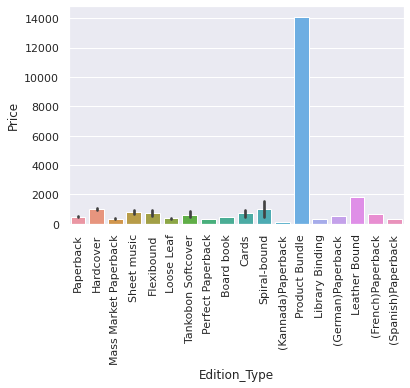

In [31]:
sns.barplot(x='Edition_Type',y='Price',data=trdata3)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

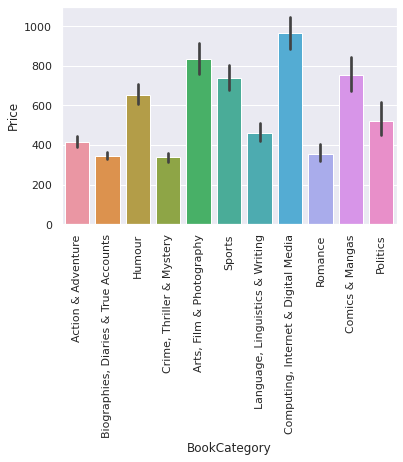

In [32]:
sns.barplot(x='BookCategory',y='Price',data=trdata3)
plt.xticks(rotation=90)

Now let's check if encoding can be done

In [33]:
set(trdata3['BookCategory'])==set(tedata3['BookCategory'])

True

In [34]:
set(trdata3['Edition_Type'])==set(tedata3['Edition_Type'])

False

In [35]:
tedata3['Edition_Type'].unique()

array(['Mass Market Paperback', 'Paperback', 'Hardcover', 'Cards',
       'Sheet music', 'Flexibound', 'Spiral-bound', '(Chinese)Paperback',
       'Loose Leaf'], dtype=object)

In [36]:
trdata3['Edition_Type'].unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       '(Kannada)Paperback', 'Product Bundle', 'Library Binding',
       '(German)Paperback', 'Leather Bound', '(French)Paperback',
       '(Spanish)Paperback'], dtype=object)

In [37]:
tedata3['Edition_Type'].value_counts()

Paperback                1265
Hardcover                 233
Mass Market Paperback      45
Sheet music                 8
Flexibound                  4
Spiral-bound                2
(Chinese)Paperback          1
Loose Leaf                  1
Cards                       1
Name: Edition_Type, dtype: int64

In [38]:
trdata3['Edition_Type'].value_counts()

Paperback                5178
Hardcover                 818
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
(Spanish)Paperback          1
(French)Paperback           1
(German)Paperback           1
(Kannada)Paperback          1
Product Bundle              1
Library Binding             1
Board book                  1
Leather Bound               1
Perfect Paperback           1
Name: Edition_Type, dtype: int64

In [39]:
trdata3['Edition_Type']=trdata3['Edition_Type'].replace(['(German)Paperback','Perfect Paperback','(Kannada)Paperback','(Spanish)Paperback','(French)Paperback'],'Paperback')
trdata3['Edition_Type']=trdata3['Edition_Type'].replace(['Tankobon Softcover','Loose Leaf','Board book','Product Bundle','Library Binding','Leather Bound'],'Rare')
tedata3['Edition_Type']=tedata3['Edition_Type'].replace(['Loose Leaf'],'Rare')
tedata3['Edition_Type']=tedata3['Edition_Type'].replace(['(Chinese)Paperback'],'Paperback')

In [40]:
set(trdata3['BookCategory'])==set(tedata3['BookCategory'])


True

In [41]:
trdata3['Edition_Type'].value_counts()

Paperback                5183
Hardcover                 818
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Rare                        9
Cards                       8
Spiral-bound                4
Name: Edition_Type, dtype: int64

In [42]:
tedata3['Edition_Type'].value_counts()

Paperback                1266
Hardcover                 233
Mass Market Paperback      45
Sheet music                 8
Flexibound                  4
Spiral-bound                2
Cards                       1
Rare                        1
Name: Edition_Type, dtype: int64

In [43]:
set(trdata3['Edition_Type'])==set(tedata3['Edition_Type'])

True

In [44]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
trdata3['BookCategory']=labelencoder.fit_transform(trdata3['BookCategory'])
trdata3['Edition_Type']=labelencoder.fit_transform(trdata3['Edition_Type'])
tedata3['BookCategory']=labelencoder.fit_transform(tedata3['BookCategory'])
tedata3['Edition_Type']=labelencoder.fit_transform(tedata3['Edition_Type'])

In [45]:
trdata3.head()

,Reviews,Ratings,BookCategory,Price,Edition_Type,Edition_Year
0,4.0,8,0,220.00,4,2016
1,3.9,14,2,202.93,4,2012
2,4.8,6,6,299.00,4,1982
3,4.1,13,5,180.00,4,2017
4,5.0,1,1,965.62,2,2006


In [46]:
trdata3.dtypes

Reviews          object
Ratings          object
BookCategory      int64
Price           float64
Edition_Type      int64
Edition_Year      int64
dtype: object

In [47]:
trdata3['Ratings']=trdata3['Ratings'].str.replace(',','')
trdata3['Ratings']

0        8
1       14
2        6
3       13
4        1
        ..
6232     2
6233     9
6234     3
6235     4
6236     2
Name: Ratings, Length: 6216, dtype: object

In [64]:
tedata3['Ratings']=tedata3['Ratings'].str.replace(',','')
tedata3['Ratings']

0       960
1         1
2         4
3        11
4         9
       ... 
1555      4
1556     13
1557      5
1558      3
1559      2
Name: Ratings, Length: 1560, dtype: object

In [65]:
trdata3['Reviews']=trdata3['Reviews'].astype('float')
trdata3['Ratings']=trdata3['Ratings'].astype('int64')
trdata3.dtypes

Reviews         float64
Ratings           int64
BookCategory      int64
Price           float64
Edition_Type      int64
Edition_Year      int64
dtype: object

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=trdata3[['Ratings','Reviews']]
vif=pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,1.055927,Ratings
1,1.055927,Reviews


In [50]:
trdata4=trdata3.copy()


In [51]:
trdata4.head()

,Reviews,Ratings,BookCategory,Price,Edition_Type,Edition_Year
0,4.0,8,0,220.00,4,2016
1,3.9,14,2,202.93,4,2012
2,4.8,6,6,299.00,4,1982
3,4.1,13,5,180.00,4,2017
4,5.0,1,1,965.62,2,2006


In [52]:
column_names=["Reviews","Ratings","BookCategory","Edition_Type","Edition_Year","Price"]
trdata4=trdata4.reindex(columns=column_names)
trdata4.head()

,Reviews,Ratings,BookCategory,Edition_Type,Edition_Year,Price
0,4.0,8,0,4,2016,220.00
1,3.9,14,2,4,2012,202.93
2,4.8,6,6,4,1982,299.00
3,4.1,13,5,4,2017,180.00
4,5.0,1,1,2,2006,965.62


In [53]:
array=trdata4.values
X=array[:,0:5]
Y=array[:,5]


In [54]:
Y

array([220.  , 202.93, 299.  , ..., 399.  , 319.  , 452.  ])

Spot checking algorithms

In [55]:


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [59]:
# Spot check algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LA', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

from sklearn.metrics import mean_absolute_error

In [61]:
# Evaluate each model
results = []
names = []
for name, model in models:
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)
  cv_results = mean_absolute_error(y_test, predictions)
  results.append(cv_results)
  names.append(name)
  msg = '%s : %f '% (name, cv_results)
  print(msg)

LR : 357.380524 
LA : 357.350139 
EN : 360.086326 
DTR : 424.006738 
KNR : 349.051529 
RFR : 345.362567 
ETR : 345.636689 


Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(input)

StandardScaler()

In [ ]:
inputs_scaled = scaler.transform(input)

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [55]:
x_train

array([[   4.4,  861. ,    8. ,    4. , 2019. ],
       [   5. ,    8. ,    3. ,    4. , 2016. ],
       [   4.4,    4. ,    3. ,    4. , 2010. ],
       ...,
       [   4.6,    3. ,    0. ,    4. , 2015. ],
       [   4.6,   11. ,   10. ,    4. , 2007. ],
       [   5. ,    3. ,    0. ,    4. , 2016. ]])

In [56]:
y_train

array([ 94.  , 562.93, 703.  , ..., 175.  , 378.91, 299.52])

In [57]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [58]:
y_hat=reg.predict(x_train)

In [59]:
y_hat

array([240.71951734, 574.81352219, 538.41592306, ..., 546.70041798,
       552.37960509, 582.38308499])

In [60]:
y_train

array([ 94.  , 562.93, 703.  , ..., 175.  , 378.91, 299.52])

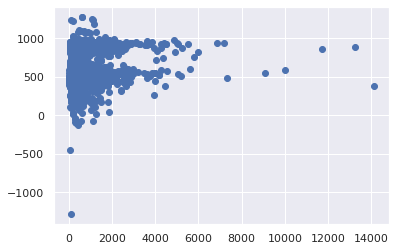

In [61]:
plt.scatter(y_train,y_hat)

In [62]:
reg.score(x_train,y_train)

0.05155660821424768

In [64]:
reg.intercept_

7941.531606933814

In [66]:
reg.coef_

array([  98.05829591,   -0.29836756,   -2.02590833, -177.64793985,
         -3.54065136])

In [71]:
df_pf = pd.DataFrame(y_hat, columns=['Prediction'])
df_pf.head()

,Prediction
0,240.719517
1,574.813522
2,538.415923
3,567.794884
4,469.830648


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
y_test

array([ 665.,  603., 1821., ...,  221.,  130.,  354.])

In [63]:
x_train.shape

(4972, 5)

In [ ]:
y_train.shape

(4972,)

In [66]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

predictions = knn.predict(tedata3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [67]:
predictions

array([268.2  , 814.2  , 282.048, ..., 338.798, 721.6  , 767.772])

In [68]:
df = pd.DataFrame({'Price':predictions})

df.to_csv('Solution.csv', index=False)